In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv('https://query.data.world/s/jboynbi75qeh5ynkznekow3jxzs3qu')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine>

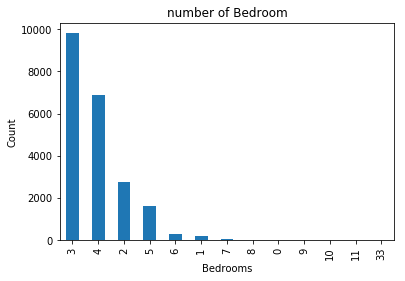

In [4]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

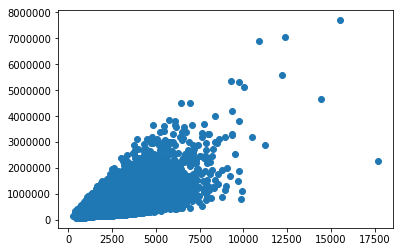

In [5]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

In [6]:
cdf = data[['price','sqft_living','sqft_basement','bedrooms','floors','condition','grade']]
cdf.head(15)

,price,sqft_living,sqft_basement,bedrooms,floors,condition,grade
0,221900.0,1180,0,3,1.0,3,7
1,538000.0,2570,400,3,2.0,3,7
2,180000.0,770,0,2,1.0,3,6
3,604000.0,1960,910,4,1.0,5,7
4,510000.0,1680,0,3,1.0,3,8
5,1225000.0,5420,1530,4,1.0,3,11
6,257500.0,1715,0,3,2.0,3,7
7,291850.0,1060,0,3,1.0,3,7
8,229500.0,1780,730,3,1.0,3,7
9,323000.0,1890,0,3,2.0,3,7


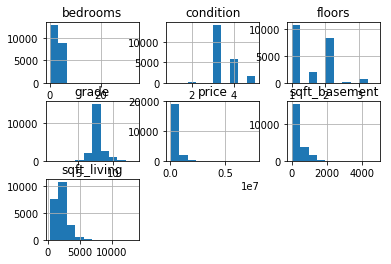

In [7]:
viz = cdf[['price','sqft_living','sqft_basement','bedrooms','floors','condition','grade']]
viz.hist()
plt.show()

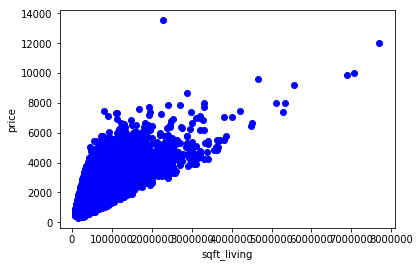

In [8]:
plt.scatter(cdf.price, cdf.sqft_living,  color='blue')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

In [0]:
msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

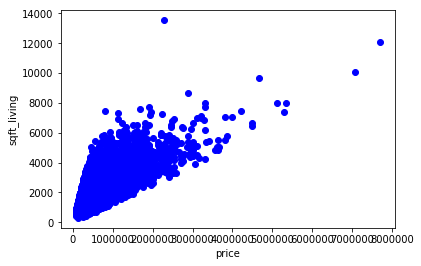

In [10]:
plt.scatter(train.price, train.sqft_living,  color='blue')
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.show()

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sqft_living']])
train_y = np.asanyarray(train[['price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[279.19610405]]
Intercept:  [-43344.54658279]


Text(0, 0.5, 'price')

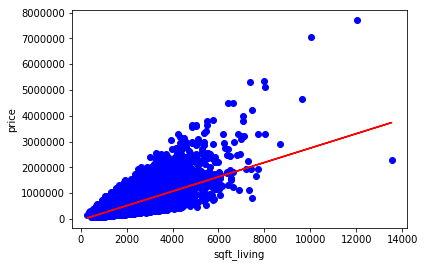

In [12]:
plt.scatter(train.sqft_living, train.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("sqft_living")
plt.ylabel("price")

In [13]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['sqft_living']])
test_y = np.asanyarray(test[['price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 175120.71
R2-score: -0.12
